## データを読み込み

`BigQuery`上に`TABLESAMPLE SYSTEM (@percent PERCENT)`で2693件のデータを抽出し、結果をcsvとしてドライブに保存

> BIgQueryは、`TABLESAMPLE`を含むクエリの結果をキャッシュに保存しないため、`rand()`のみ使いサンプリングするより、コストやパフォーマンスが改善できそう

```sql
@BigQuery
SELECT *
FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
TABLESAMPLE SYSTEM (0.00001 PERCENT)
WHERE rand() < 0.001
```

In [123]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [124]:
import pandas as pd
raw_dataset = pd.read_csv('/content/drive/MyDrive/bq-results/bq-results.csv')
dataset = raw_dataset.copy()

In [125]:
dataset

,unique_key,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,...,extras,trip_total,payment_type,company,pickup_latitude,pickup_longitude,pickup_location,dropoff_latitude,dropoff_longitude,dropoff_location
0,d61f171869ff679f1beac27804db4e3a4d0ab205,ae6ec23c69d74e3a0a765ce3ab829c6735ed0377370ed3...,2014-12-12 07:45:00 UTC,2014-12-12 07:45:00 UTC,0,0.0,NaN,NaN,16.0,16.0,...,0.0,3.25,Cash,Dispatch Taxi Affiliation,41.953582,-87.723452,POINT (-87.7234523905 41.9535821253),41.953582,-87.723452,POINT (-87.7234523905 41.9535821253)
1,13004b1e5bfdf88250a4bbfcbf98287657243b53,c49f0ddc62fe52ff6d19832b7168a6818f17d8ccb7f59a...,2015-01-05 18:30:00 UTC,2015-01-05 18:30:00 UTC,360,1.2,NaN,NaN,15.0,16.0,...,0.0,5.85,Cash,Taxi Affiliation Services,41.954028,-87.763399,POINT (-87.7633990316 41.9540276487),41.953582,-87.723452,POINT (-87.7234523905 41.9535821253)
2,b0ed50db129a9ee4693b2126586ec70aae71fc35,28874ca106e42098e711a7568fa2fb514b2c92de46fe3b...,2015-01-06 09:15:00 UTC,2015-01-06 09:45:00 UTC,1080,3.5,NaN,NaN,29.0,58.0,...,0.0,11.85,Cash,Taxi Affiliation Services,41.860190,-87.717220,POINT (-87.7172201 41.8601900192),41.817366,-87.698861,POINT (-87.6988607973 41.8173662079)
3,14850d3360fdc9756c5e4520da6921021226cded,4b7d4f7564151f5ed13b585419c1aea363ddf42e93bb40...,2014-11-12 04:15:00 UTC,2014-11-12 04:15:00 UTC,300,1.0,NaN,NaN,14.0,13.0,...,0.0,5.65,Cash,Taxi Affiliation Services,41.968069,-87.721559,POINT (-87.7215590627 41.968069),41.983636,-87.723583,POINT (-87.7235831853 41.9836363072)
4,193182becee90fd226dd6ec3878fa2ff72000ba6,0602c4dcde4b0fa95e24da18797128a90565512392fffd...,2014-12-11 20:30:00 UTC,2014-12-11 21:00:00 UTC,1200,10.3,1.703128e+10,1.703198e+10,28.0,56.0,...,2.0,32.05,Credit Card,Taxi Affiliation Services,41.869274,-87.664047,POINT (-87.6640472412 41.8692744531),41.785999,-87.750934,POINT (-87.7509342894 41.785998518)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2688,21a29db8caa27766cbb121796ab0c61b098f24d0,2b7e837432c46345131f9826aae2d55e2fdd4d7ebdd6a2...,2015-01-27 03:30:00 UTC,2015-01-27 03:30:00 UTC,600,2.3,NaN,NaN,22.0,6.0,...,0.0,8.25,Cash,Taxi Affiliation Services,41.922761,-87.699155,POINT (-87.69915534320002 41.9227606205),41.944227,-87.655998,POINT (-87.6559981815 41.9442266014)
2689,20105e8dcfac7e86d6b795f5bd2275bb5d94b5be,dc5b9589d520699d09d46be9c514998c013c755321217a...,2015-03-13 22:00:00 UTC,2015-03-13 22:00:00 UTC,540,0.2,NaN,NaN,22.0,24.0,...,0.0,10.25,Cash,Taxi Affiliation Services,41.922761,-87.699155,POINT (-87.69915534320002 41.9227606205),41.901207,-87.676356,POINT (-87.6763559892 41.90120699410001)
2690,5653b6af7ce6f55c95c9f2dd337d60262a956772,ecda1a33da347992e0113c56f8f906bb77f206e8fa6225...,2015-03-13 21:00:00 UTC,2015-03-13 21:15:00 UTC,420,1.2,NaN,NaN,22.0,24.0,...,0.0,5.85,Cash,Northwest Management LLC,41.922761,-87.699155,POINT (-87.69915534320002 41.9227606205),41.901207,-87.676356,POINT (-87.6763559892 41.90120699410001)
2691,07f03869b6c0868a969b3703044f54203f84b079,19e804a8eab9224b352e6a384007418b519864a3e7c2d9...,2015-02-05 02:30:00 UTC,2015-02-05 02:30:00 UTC,360,1.0,NaN,NaN,22.0,24.0,...,0.0,5.25,Cash,Taxi Affiliation Services,41.922761,-87.699155,POINT (-87.69915534320002 41.9227606205),41.901207,-87.676356,POINT (-87.6763559892 41.90120699410001)


## データ前処理

In [126]:
import tensorflow as tf
import numpy as np

from tensorflow import keras
from keras import layers
print(tf.__version__)

2.12.0


### 欠損値を確認

In [127]:
dataset.isna().sum()

unique_key                  0
taxi_id                     0
trip_start_timestamp        0
trip_end_timestamp          0
trip_seconds                0
trip_miles                  0
pickup_census_tract       980
dropoff_census_tract      990
pickup_community_area     366
dropoff_community_area    421
fare                        0
tips                        0
tolls                      10
extras                      0
trip_total                  0
payment_type                0
company                    13
pickup_latitude           366
pickup_longitude          366
pickup_location           366
dropoff_latitude          420
dropoff_longitude         420
dropoff_location          420
dtype: int64

欠損値と`id`,`key`などを削除

In [128]:
dataset = dataset.drop("unique_key",axis=1).drop("taxi_id",axis=1).dropna(axis=1)

`payment_type`を数値化

In [129]:
dict = {'Cash': 1, 'Credit Card': 2, 'Dispute': 3, 'No Charge': 4, 'Unknown': 5, 'Prcard': 6, 'Mobile': 7, }
dataset['payment_type'] = [dict[item] for item in dataset['payment_type']]

`String`型の`trip_start_timestamp`と`trip_end_timestamp`をタイムスタンプ型に変更

In [130]:
from datetime import datetime
dataset['trip_start_timestamp']=[datetime.timestamp(datetime.strptime(item.replace(' UTC',''), '%Y-%m-%d %H:%M:%S')) for item in dataset['trip_start_timestamp']]
dataset['trip_end_timestamp']=[datetime.timestamp(datetime.strptime(item.replace(' UTC',''), '%Y-%m-%d %H:%M:%S')) for item in dataset['trip_end_timestamp']]


In [131]:
dataset

,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,fare,tips,extras,trip_total,payment_type
0,1.418370e+09,1.418370e+09,0,0.0,3.25,0.0,0.0,3.25,1
1,1.420483e+09,1.420483e+09,360,1.2,5.85,0.0,0.0,5.85,1
2,1.420536e+09,1.420538e+09,1080,3.5,11.85,0.0,0.0,11.85,1
3,1.415766e+09,1.415766e+09,300,1.0,5.65,0.0,0.0,5.65,1
4,1.418330e+09,1.418332e+09,1200,10.3,23.65,6.4,2.0,32.05,2
...,...,...,...,...,...,...,...,...,...
2688,1.422329e+09,1.422329e+09,600,2.3,8.25,0.0,0.0,8.25,1
2689,1.426284e+09,1.426284e+09,540,0.2,10.25,0.0,0.0,10.25,1
2690,1.426280e+09,1.426281e+09,420,1.2,5.85,0.0,0.0,5.85,1
2691,1.423103e+09,1.423103e+09,360,1.0,5.25,0.0,0.0,5.25,1


### データを観察

In [132]:
pip install -q seaborn

In [133]:
import seaborn as sns

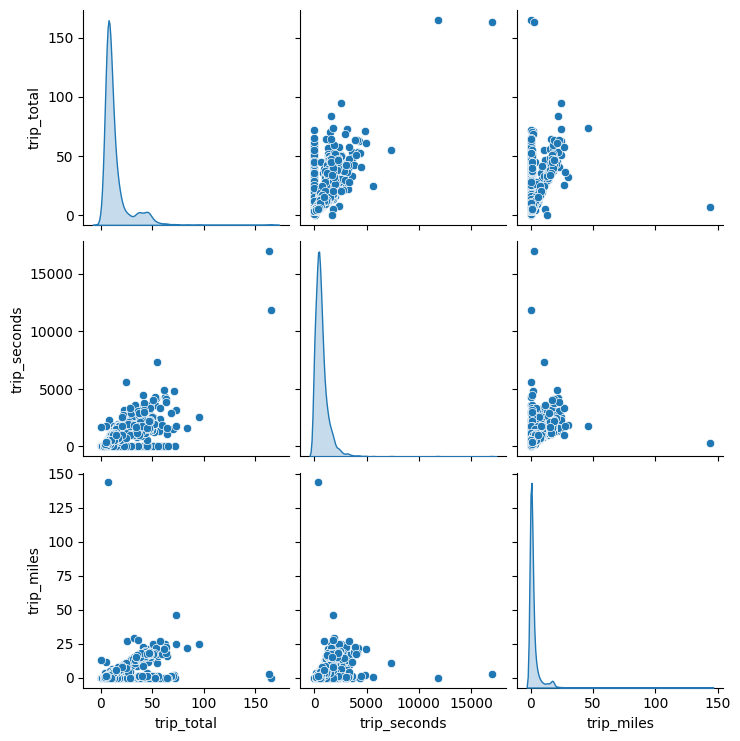

In [134]:
sns.pairplot(dataset[["trip_total", "trip_seconds", "trip_miles"]], diag_kind = "kde")

`trip_total`と`trip_seconds`, `trip_miles`の相関関係は基本的に正相関

### トレーニングデータとテストデータを分割

In [135]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

### ラベルと特徴量を分割

In [136]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('trip_total')
test_labels = test_features.pop('trip_total')

### 正規化

In [137]:
train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
trip_start_timestamp,1.425025e+09,3.032599e+07
trip_end_timestamp,1.425026e+09,3.032607e+07
trip_seconds,6.581309e+02,7.625172e+02
trip_miles,2.207693e+00,5.091093e+00
fare,1.180144e+01,1.071782e+01
tips,1.273500e+00,2.160757e+00
extras,6.603157e-01,1.666713e+00
trip_total,1.373897e+01,1.251897e+01
payment_type,1.480966e+00,6.662592e-01


In [138]:
normalizer = tf.keras.layers.Normalization(axis=-1)

In [139]:
np.asarray(train_features).astype(np.float32)

array([[1.4196114e+09, 1.4196132e+09, 1.5600000e+03, ..., 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [1.4215662e+09, 1.4215662e+09, 4.2000000e+02, ..., 0.0000000e+00,
        1.0000000e+00, 1.0000000e+00],
       [1.4219145e+09, 1.4219154e+09, 4.2000000e+02, ..., 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       ...,
       [1.4185386e+09, 1.4185404e+09, 1.6200000e+03, ..., 1.2500000e+01,
        2.0000000e+00, 2.0000000e+00],
       [1.4225553e+09, 1.4225553e+09, 0.0000000e+00, ..., 1.1300000e+00,
        0.0000000e+00, 2.0000000e+00],
       [1.4225805e+09, 1.4225805e+09, 5.4000000e+02, ..., 2.0000000e+00,
        1.0000000e+00, 2.0000000e+00]], dtype=float32)

In [140]:
normalizer.adapt(train_features)

In [141]:
print(normalizer.mean.numpy())

[[1.4250257e+09 1.4250263e+09 6.5813086e+02 2.2076929e+00 1.1801440e+01
  1.2735010e+00 6.6031569e-01 1.4809657e+00]]


In [142]:
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

First example: [[1.42e+09 1.42e+09 1.56e+03 8.90e+00 2.19e+01 0.00e+00 0.00e+00 1.00e+00]]

Normalized: [[-0.18 -0.18  1.18  1.31  0.94 -0.59 -0.4  -0.72]]


## 予測モデルを作成し、トレーニングする

### 線形回帰

#### 一つの変数

単一変数の線形回帰モデルには、2つのステップ
- 入力 `trip_miles` を正規化
- 線形変換 ( 𝑦=𝑚𝑥+𝑏 ) を適用して、`layers.Dense` を使用して1つの出力を生成

In [143]:
trip_miles = np.array(train_features['trip_miles'])
# `trip_miles`レイヤーを作成
trip_miles_normalizer = layers.Normalization(input_shape=[1,], axis=None)
trip_miles_normalizer.adapt(trip_miles)

In [144]:
# `Sequential`モデルを作成
trip_miles_model = tf.keras.Sequential([
    trip_miles_normalizer,
    layers.Dense(units=1)
])

trip_miles_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_3 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense_14 (Dense)            (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [145]:
trip_miles_model.predict(trip_miles[:10])

1/1 [==============================] - 0s 122ms/step


array([[-0.17622298],
       [ 0.02126831],
       [ 0.02390153],
       [ 0.05813335],
       [ 0.05813335],
       [-0.2525863 ],
       [ 0.04233405],
       [-0.07616073],
       [-0.00506387],
       [ 0.02126831]], dtype=float32)

In [146]:
trip_miles_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

`Model.fit`でトレーニング

In [147]:
%%time
history = trip_miles_model.fit(
    train_features['trip_miles'],
    train_labels,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

CPU times: user 16.9 s, sys: 554 ms, total: 17.4 s
Wall time: 26 s


`history`オブジェクトに保存された数値を使ってモデルのトレーニングの様子を可視化

In [148]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,5.115479,4.845876,95
96,5.107720,4.838876,96
97,5.103333,4.856648,97
98,5.109174,4.851553,98
99,5.103088,4.848031,99


In [149]:
import matplotlib.pyplot as plt
def plot_loss(history):
  plt.plot(history.history['loss'], label='Train loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('loss')
  plt.legend()
  plt.grid(True)

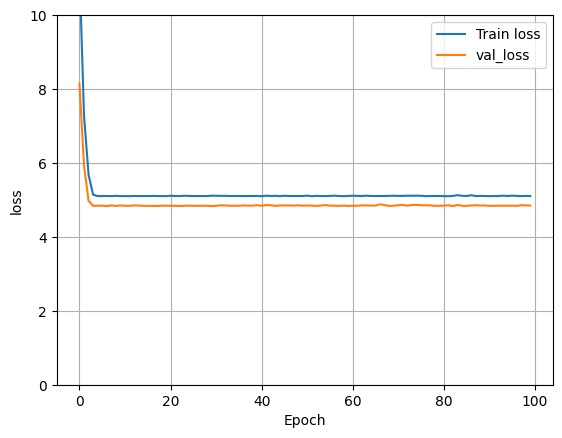

In [150]:
plot_loss(history)

In [151]:
test_results = {}

test_results['trip_miles_model'] = trip_miles_model.evaluate(
    test_features['trip_miles'],
    test_labels, verbose=0)

In [152]:
x = tf.linspace(0.0, 60, 61)
y = trip_miles_model.predict(x)

2/2 [==============================] - 0s 8ms/step


`tf.linspace`: 指定された軸に沿った間隔で値を生成
```
tf.linspace(
    start, stop, num, name=None, axis=0
)
```

In [153]:
def plot_trip_miles(x, y):
  plt.scatter(train_features['trip_miles'], train_labels, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('trip_miles')
  plt.ylabel('trip_total')
  plt.legend()

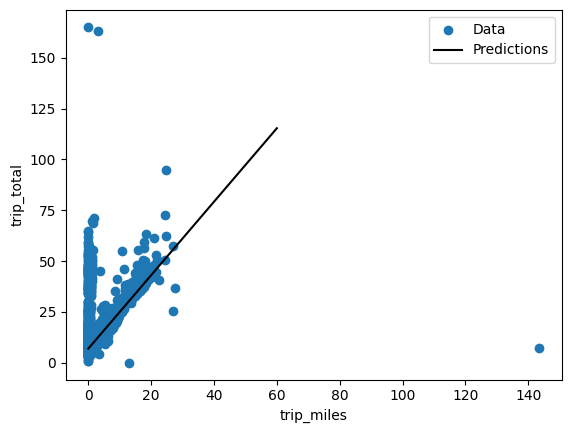

In [154]:
plot_trip_miles(x, y)

#### 複数の入力

In [155]:
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

In [156]:
linear_model.predict(train_features[:10])

1/1 [==============================] - 0s 98ms/step


array([[-0.29269758],
       [ 1.0622696 ],
       [ 1.0604103 ],
       [ 0.8500762 ],
       [-0.5757467 ],
       [ 0.08212826],
       [ 1.1749268 ],
       [ 0.67708015],
       [ 0.46346396],
       [ 1.1998656 ]], dtype=float32)

In [157]:
linear_model.layers[1].kernel

<tf.Variable 'dense_15/kernel:0' shape=(8, 1) dtype=float32, numpy=
array([[-0.54926574],
       [-0.04383224],
       [-0.7197542 ],
       [ 0.39157772],
       [-0.6147937 ],
       [-0.11338025],
       [ 0.03628689],
       [-0.63998127]], dtype=float32)>

In [158]:
linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [159]:
%%time
history = linear_model.fit(
    train_features,
    train_labels,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

CPU times: user 14.4 s, sys: 585 ms, total: 15 s
Wall time: 19.1 s


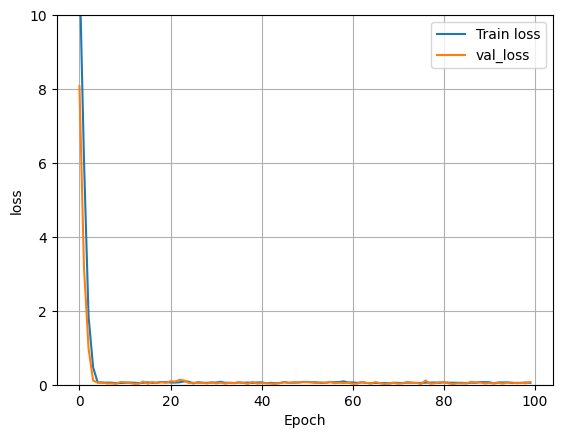

In [160]:
plot_loss(history)

In [161]:
test_results['linear_model'] = linear_model.evaluate(
    test_features, test_labels, verbose=0)

### DNN回帰

In [162]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])
  # コンパイル
  # 損失関数はMSEと指定
  model.compile(loss='mean_squared_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

#### DNNと単一入力を使用した回帰

In [163]:
dnn_trip_miles_model = build_and_compile_model(trip_miles_normalizer)

モデルを視覚化

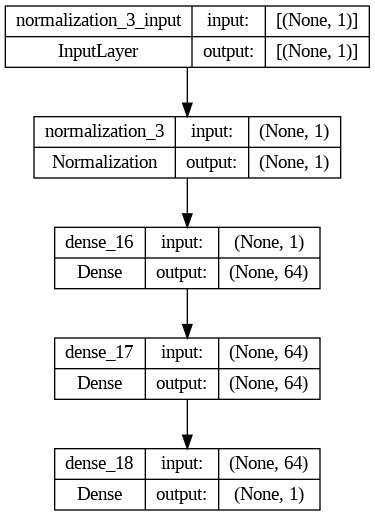

In [164]:
from tensorflow.keras.utils import plot_model
plot_model(dnn_trip_miles_model,show_shapes=True)

In [165]:
dnn_trip_miles_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_3 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense_16 (Dense)            (None, 64)                128       
                                                                 
 dense_17 (Dense)            (None, 64)                4160      
                                                                 
 dense_18 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4,356
Trainable params: 4,353
Non-trainable params: 3
_________________________________________________________________


In [166]:
%%time
history = dnn_trip_miles_model.fit(
    train_features['trip_miles'],
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

CPU times: user 16.5 s, sys: 622 ms, total: 17.1 s
Wall time: 16.9 s


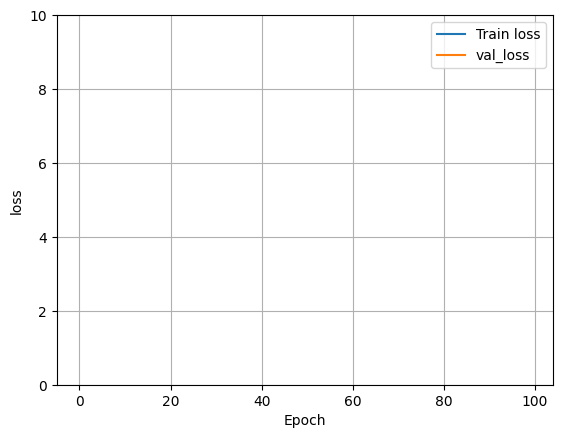

In [167]:
plot_loss(history)

In [168]:
x = tf.linspace(0.0, 40, 41)
y = dnn_trip_miles_model.predict(x)

2/2 [==============================] - 0s 6ms/step


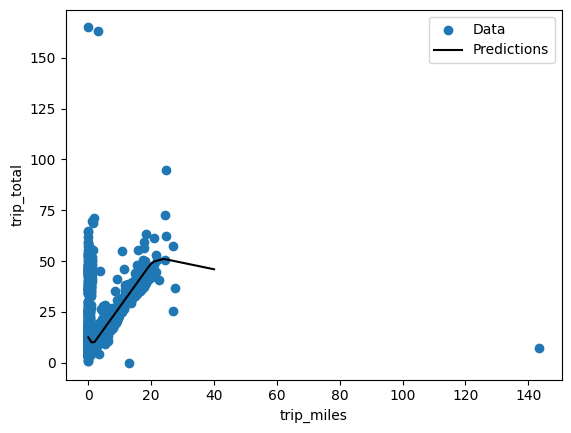

In [169]:
plot_trip_miles(x, y)

In [170]:
test_results['dnn_trip_miles_model'] = dnn_trip_miles_model.evaluate(
    test_features['trip_miles'], test_labels,
    verbose=0)

### 完全モデル

In [171]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_2 (Normalizat  (None, 8)                17        
 ion)                                                            
                                                                 
 dense_19 (Dense)            (None, 64)                576       
                                                                 
 dense_20 (Dense)            (None, 64)                4160      
                                                                 
 dense_21 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4,818
Trainable params: 4,801
Non-trainable params: 17
_________________________________________________________________


モデルを視覚化

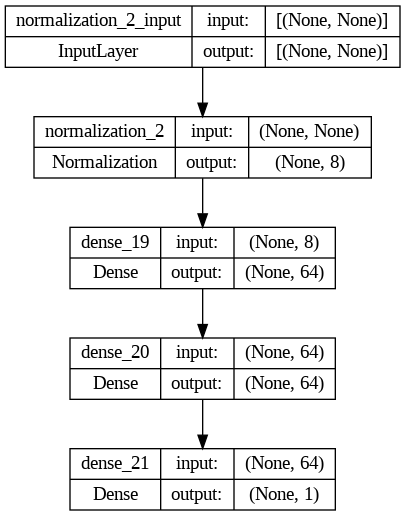

In [172]:
plot_model(dnn_model,show_shapes=True)

学習の実行

In [173]:
%%time
history = dnn_model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

CPU times: user 19 s, sys: 649 ms, total: 19.7 s
Wall time: 21.6 s


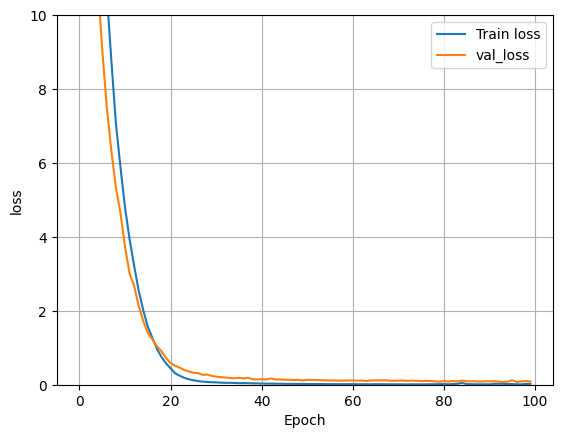

In [174]:
plot_loss(history)

In [175]:
test_results['dnn_model'] = dnn_model.evaluate(test_features, test_labels, verbose=0)

## モデルを評価する

In [176]:
pd.DataFrame(test_results, index=['Mean Squared Error [trip_total]']).T

,Mean Squared Error [trip_total]
trip_miles_model,4.952704
linear_model,0.078333
dnn_trip_miles_model,88.358894
dnn_model,0.080342


17/17 [==============================] - 0s 2ms/step


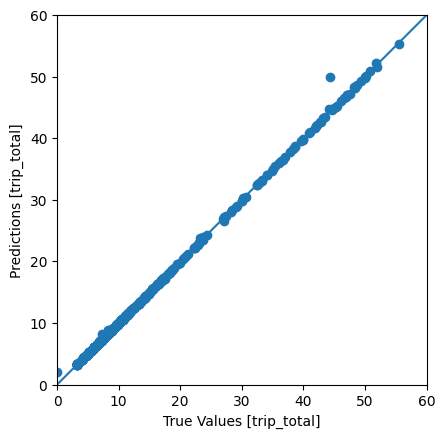

In [177]:
test_predictions = dnn_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [trip_total]')
plt.ylabel('Predictions [trip_total]')
lims = [0, 60]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [178]:
dnn_model.save('dnn_model')

In [179]:
reloaded = tf.keras.models.load_model('dnn_model')

test_results['reloaded'] = reloaded.evaluate(
    test_features, test_labels, verbose=0)

In [180]:
pd.DataFrame(test_results, index=['Mean Squared Error [trip_total]']).T

,Mean Squared Error [trip_total]
trip_miles_model,4.952704
linear_model,0.078333
dnn_trip_miles_model,88.358894
dnn_model,0.080342
reloaded,0.080342


## RMSE

RMSE(Root Mean Squared Error): 平均二乗誤差の平方根

In [181]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
print('RMSE:')
print(np.sqrt(mean_squared_error(test_labels, test_predictions)))
print('MAE:')
print(mean_absolute_error(test_labels, test_predictions))

RMSE:
0.2834466086822019
MAE:
0.07771624018398418
